# Load Library

In [9]:
#System and performance tool
import os

from scipy.stats import norm

#Visualization Tool
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Set raw data folder
RAW_DATA_FOLDER = '/Users/yogisharosarumaha/Documents/GitHub/Predict-House-Price'

# Import Data

In [11]:
#Load Data
import pandas as pd
train_df            =pd.read_csv(os.path.join(RAW_DATA_FOLDER,'train.csv'))
test_df             =pd.read_csv(os.path.join(RAW_DATA_FOLDER,'test.csv'))

In [26]:
#Snapshot of data
print('train_shape : ' + str(train_df.shape))
print(train_df.head(3))
print('-'*100)
print('test_shape : ' + str(test_df.shape))
print(test_df.head(3))
print('-'*100)
print('-'*100)
train_df.info()

train_shape : (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]
----------------------------------------------------------------------------------------------------
test_shape : (1459, 80)
     Id  MSSubCla

### House Selling Price

Text(0.5, 1.0, 'House Sale Price Distribution')

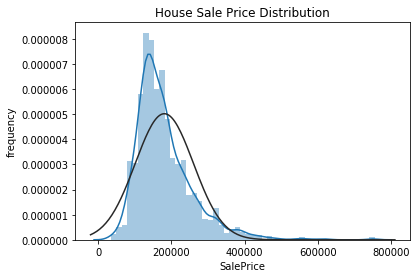

In [13]:
#Check house price distribution 
sns.distplot(train_df['SalePrice'],fit=norm)

plt.ylabel('frequency')
plt.title('House Sale Price Distribution')

### Missing Value

In [14]:
#Check Missing values between columns
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0].to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Variables']
missing_values['Variables'] = missing_values.index

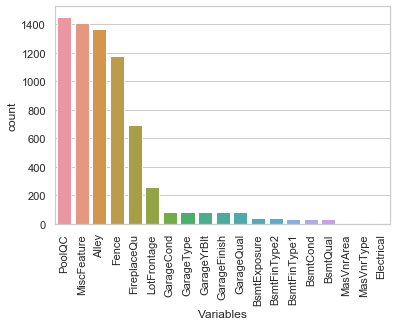

In [15]:
#Lots of missing values coming from PoolQC Variables, followed by MiscFeature
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Variables', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [40]:
### Correlation Matrix

In [52]:
train_df.select_dtypes('number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [53]:
#Using correlation, SalePrice has highest relationship with OverallQual (0.790982 correlation coefficient)
#Let's try using linear regression to see how the predictions perform
corr = train_df.select_dtypes('number').corr()
corr.head()
corr.style.background_gradient(cmap='coolwarm', axis=None)

### Linear Regression 

In [82]:
from sklearn.linear_model import LinearRegression
import numpy as np 
#Defining feature matrix(X) and response vector(y)
X = np.array(train_df['OverallQual']).reshape(-1,1) # Reshape data for one feature
y = np.array(train_df['SalePrice']).reshape(-1,1) # Reshape data to avoid error

#Splitting X and y into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# generate linear regression object
reg = linear_model.LinearRegression()

# Train model using training set
reg.fit(X_train, y_train)

# Print regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: Closer than 1 means better
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [[45253.56117258]]
Variance score: 0.642633304410077


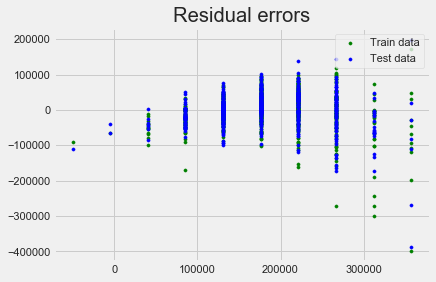

In [84]:
#Code Inspiration : https://www.geeksforgeeks.org/linear-regression-python-implementation/
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()


#We can still improve the model because currently using only 1 variable